Task 1: Exploratory Data Analysis (EDA)
Load the Mushroom dataset and perform fundamental data exploration.
Utilize histograms, box plots, or density plots to understand feature distributions.
Investigate feature correlations to discern relationships within the data.
Task 2: Data Preprocessing
Encode categorical variables if necessary.
Split the dataset into training and testing sets.
Task 3: Data Visualization
Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.
Visualize class distributions to gauge dataset balance or imbalance.
Task 4: SVM Implementation
Implement a basic SVM classifier using Python libraries like scikit-learn.
Train the SVM model on the training data.
Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).
Task 5: Visualization of SVM Results
Visualize classification results on the testing data.
Task 6: Parameter Tuning and Optimization
Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.
Task 7: Comparison and Analysis
Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).
Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.
Discuss practical implications of SVM in real-world classification tasks.


In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("mushroom.csv")
data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [3]:
# drop the Unnamed:0 column 
if "Unnamed: 0" in data.columns:
    data=data.drop(columns=["Unnamed: 0"])

In [4]:
data

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,bell,smooth,white,no,pungent,free,close,narrow,orange,enlarging,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [5]:
# verifying the missing values 
data.isnull().sum()

cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [6]:
# verying the duplicated data
data.duplicated().sum()

1024

In [7]:
# dropping the duplicated 
data.drop_duplicates(inplace=True)

In [8]:
data.duplicated().sum()

0

#Utilize histograms, box plots, or density plots to understand feature distributions. Investigate feature correlations to discern relationships within the data

In [9]:
# histogram 
import seaborn as sns 
import matplotlib.pyplot as plt

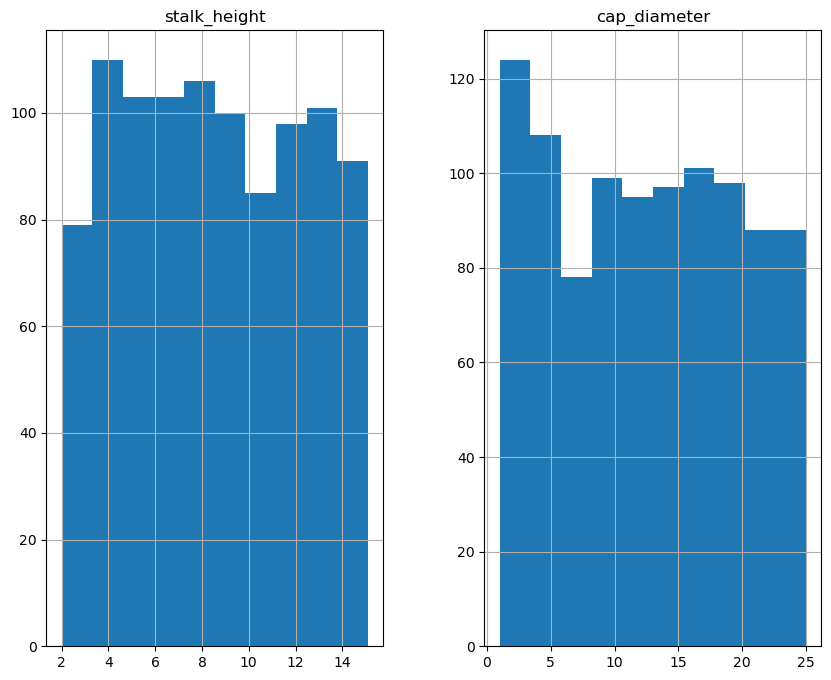

In [10]:
# this will plot only numerical values 
data.hist(figsize=(10,8))
plt.show()

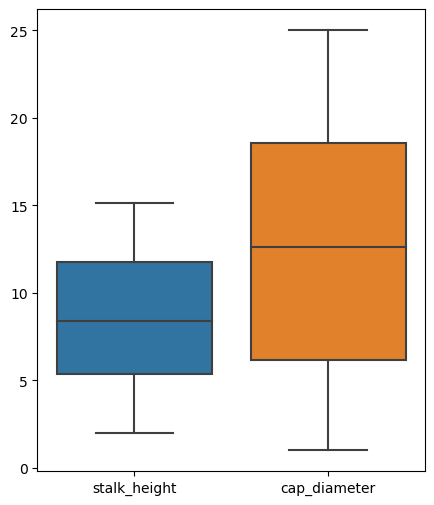

In [11]:
# boxplot
plt.figure(figsize=(5,6))
sns.boxplot(data=data)
plt.show()

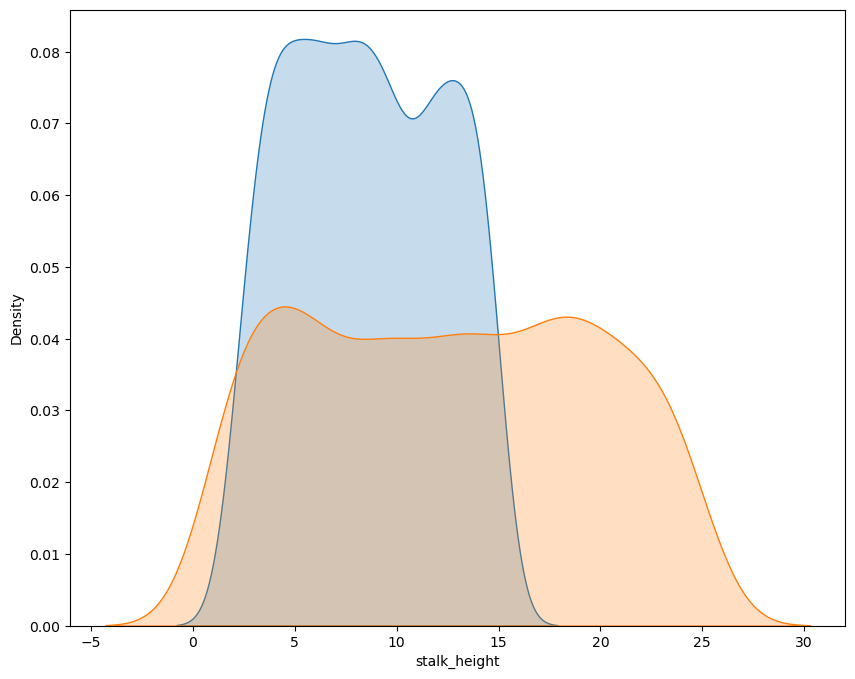

In [12]:
# density plot 
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(10,8))
for column in data.columns:
    if pd.api.types.is_numeric_dtype(data[column]):
        sns.kdeplot(data[column],shade=True)
plt.show()

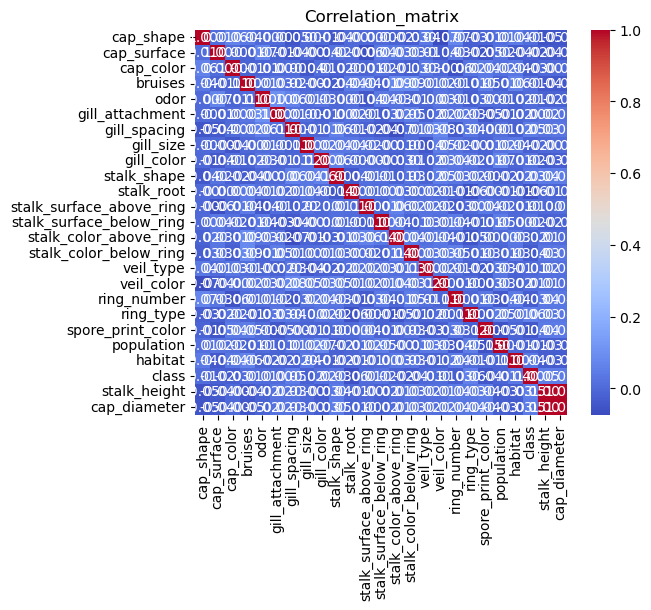

In [13]:
# correlation matrix 
encoded = data.apply((lambda x: pd.factorize(x)[0]))
corr_matrix=encoded.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix,cmap="coolwarm",annot=True,fmt='.2f')
plt.title('Correlation_matrix')
plt.show()

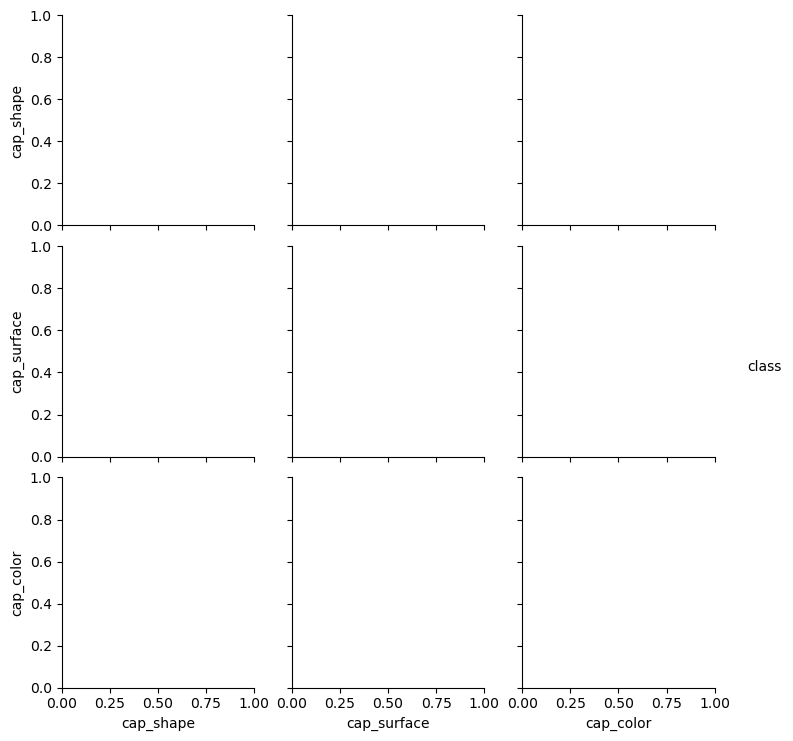

In [15]:
filtered_mushrooms = data[data['class'].isin([0, 1])]

# Select a subset of features for the pairplot
selected_features = ['class', 'cap_shape', 'cap_surface', 'cap_color']

# Create the pairplot
sns.pairplot(filtered_mushrooms[selected_features], hue='class')
plt.show()

# Data Preprocessing 

In [16]:
# All the data are categorical columns so we used Label encoding 
from sklearn.preprocessing import LabelEncoder

In [17]:
# Initialize label encoder
le = LabelEncoder()

# Encode each feature
for column in data.columns:
    data[column] = le.fit_transform(data[column])

print(data.head())

   cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
0          4            2          7        0     1                1   
1          4            0          6        0     1                3   
2          3            1          5        1     4                1   
3          0            2          4        1     3                3   
4          3            3          8        1     5                2   

   gill_spacing  gill_size  gill_color  stalk_shape  ...  veil_type  \
0             2          0           7            1  ...          0   
1             1          1           3            0  ...          1   
2             1          0           8            1  ...          1   
3             0          0           6            0  ...          0   
4             1          1           6            0  ...          1   

   veil_color  ring_number  ring_type  spore_print_color  population  habitat  \
0           0            2          6                  3   

# Data Visualization 

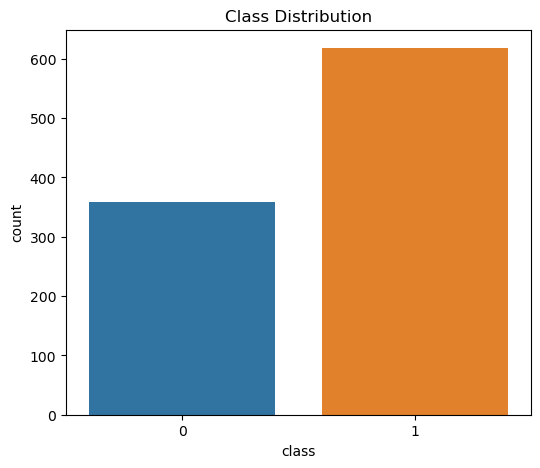

In [18]:
# Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships. 
# class distribution
plt.figure(figsize=(6,5))
sns.countplot(data=data,x="class")
plt.title('Class Distribution')
plt.show()

<Axes: xlabel='cap_surface', ylabel='cap_color'>

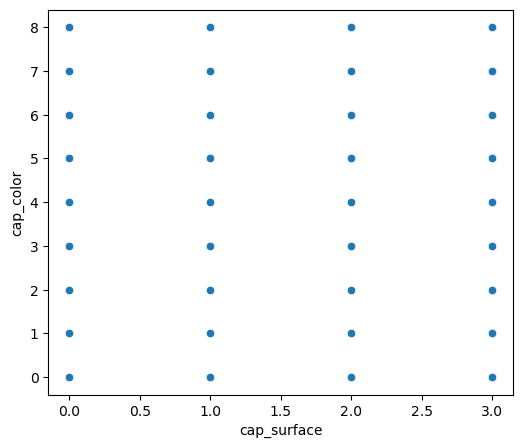

In [19]:
# Scatterplot for cap_surface vs cap_color
plt.figure(figsize=(6,5))
sns.scatterplot(data=data,x="cap_surface",y="cap_color")

<Axes: ylabel='Density'>

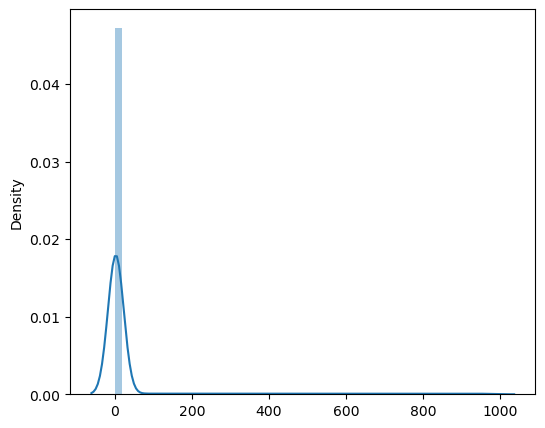

In [20]:
# distribution of data by using distplot for cap_shape vs cap_color
plt.figure(figsize=(6,5))
sns.distplot(data)

In [21]:
#  split the datasets into features & target 

In [22]:
features=data.drop("class",axis=1)
target =data["class"]

# split the datasets into training and testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.7,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(683, 24)
(293, 24)
(683,)
(293,)


In [23]:
# SVM implementations
from sklearn.svm import SVC

# initialize the model 
SVM_model=SVC(C=1.0,
    kernel='linear',
    gamma='scale')

# train the model 
SVM_model.fit(x_train,y_train)

# Evaluate the model performance on the testing data
y_pred=SVM_model.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report
# Accuracy_results
Accuracy=accuracy_score(y_test,y_pred)

# Precision_results 
precision=precision_score(y_test,y_pred)

# Recall_results 
recall=recall_score(y_test,y_pred)

# confusion_matrix 
confusion=confusion_matrix(y_test,y_pred)

# Classification_report 
classification_report=classification_report(y_test,y_pred)

In [25]:
# Print the results 
print(f'Accuracy_score:-{Accuracy}')
print(f'Precision_score:-{precision}')
print(f'Recall_score:-{recall}')
print(f'Confusion_matrix:-{confusion_matrix}')
print(f'Classification_report:-{classification_report}')

Accuracy_score:-0.6382252559726962
Precision_score:-0.6382252559726962
Recall_score:-1.0
Confusion_matrix:-<function confusion_matrix at 0x0000017E4DA0C0E0>
Classification_report:-              precision    recall  f1-score   support

           0       0.00      0.00      0.00       106
           1       0.64      1.00      0.78       187

    accuracy                           0.64       293
   macro avg       0.32      0.50      0.39       293
weighted avg       0.41      0.64      0.50       293



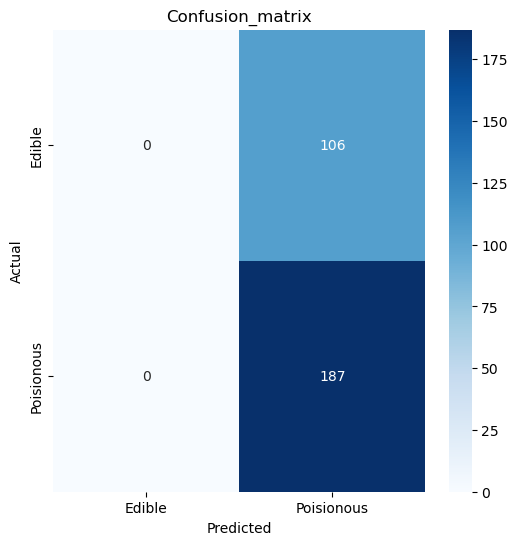

In [26]:
# Visualization of SVM Results

plt.figure(figsize=(6,6))
# confusion matrix visualization 
sns.heatmap(confusion,annot=True,cmap="Blues",fmt="d",xticklabels=["Edible","Poisionous"],yticklabels=["Edible","Poisionous"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion_matrix")
plt.show()

# Parameter Tuning and Optimization Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance. 

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
    "gamma": ["scale", "auto"]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, verbose=2)

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.5s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.4s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.3s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.4s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.5s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scal